# K-means

In [4]:
from sklearn.datasets import load_iris,load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
iris= load_breast_cancer()
X= iris.data
y= iris.target

df=pd.DataFrame(X,columns=iris.feature_names)
df["Class"]=y 

pd.set_option("display.max_columns",None)
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


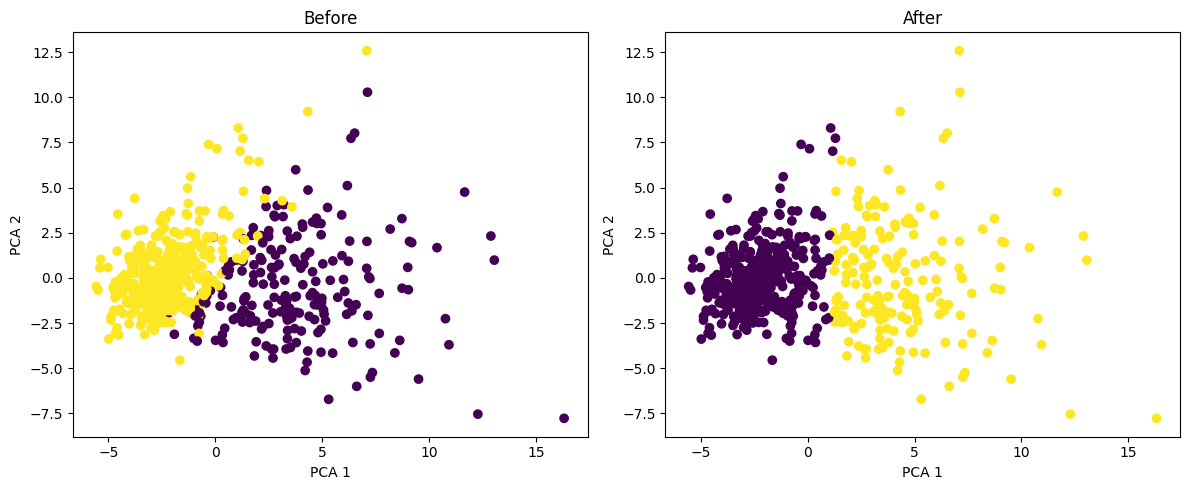

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2,random_state=0)
labels = kmeans.fit_predict(X_scaled)


plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Before")

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("After")

plt.tight_layout()
plt.show()



# Fuzzy C-means

In [8]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import skfuzzy as fuzz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

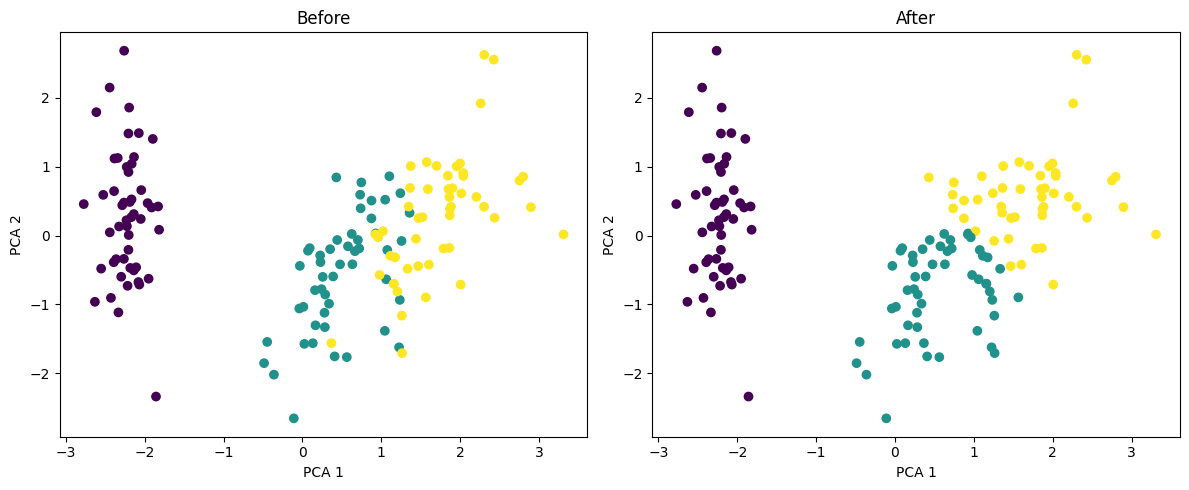

In [11]:
iris = load_iris()
X= iris.data
y= iris.target

df = pd.DataFrame(X,columns=iris.feature_names)
df["Class"] = y

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_fcm = X_scaled.T 

cntr,u,u0,d,jm,p,fpc = fuzz.cluster.cmeans(
    X_fcm,
    c=3,
    m=2.0,
    error = 0.005,
    maxiter= 1000,
    init = None
)

labels = np.argmax(u,axis=0)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Before")

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("After")

plt.tight_layout()
plt.show()

# AGNES 

In [12]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

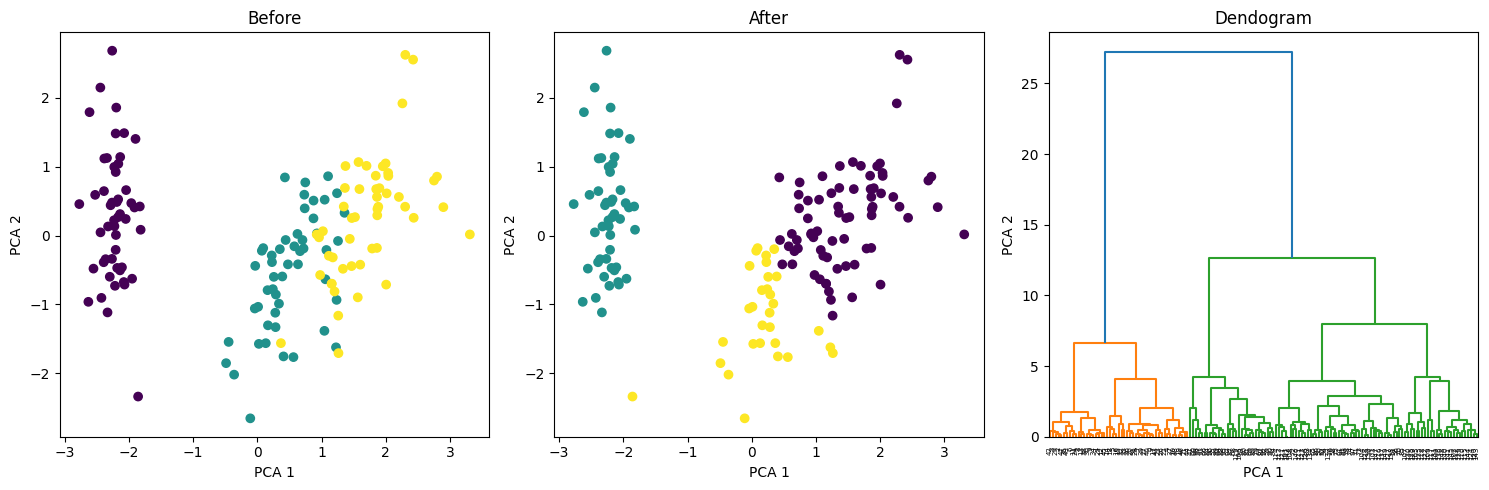

In [22]:
iris = load_iris()
X= iris.data
y= iris.target

df = pd.DataFrame(X,columns=iris.feature_names)
df["Class"] = y

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
 

agnes = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"
)

labels = agnes.fit_predict(X_scaled)

plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Before")

plt.subplot(1,3,2)
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("After")

linked = linkage(X_scaled,method="ward")
plt.subplot(1,3,3)
dendrogram(linked)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Dendogram")



plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Before')

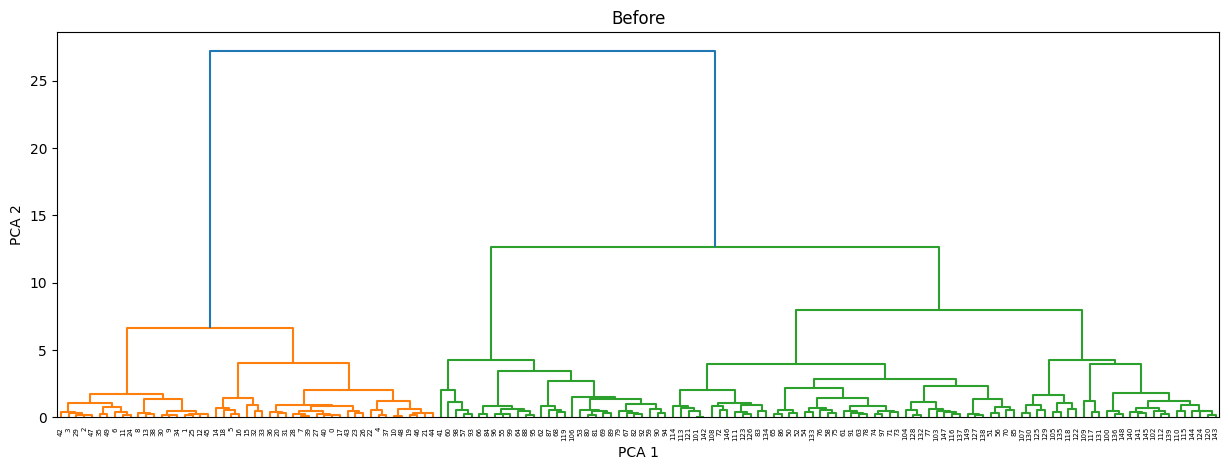

In [17]:
plt.figure(figsize=[15,5])

plt.subplot(1,1,1)
dendrogram(linked)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Before")

# DAINA

In [23]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

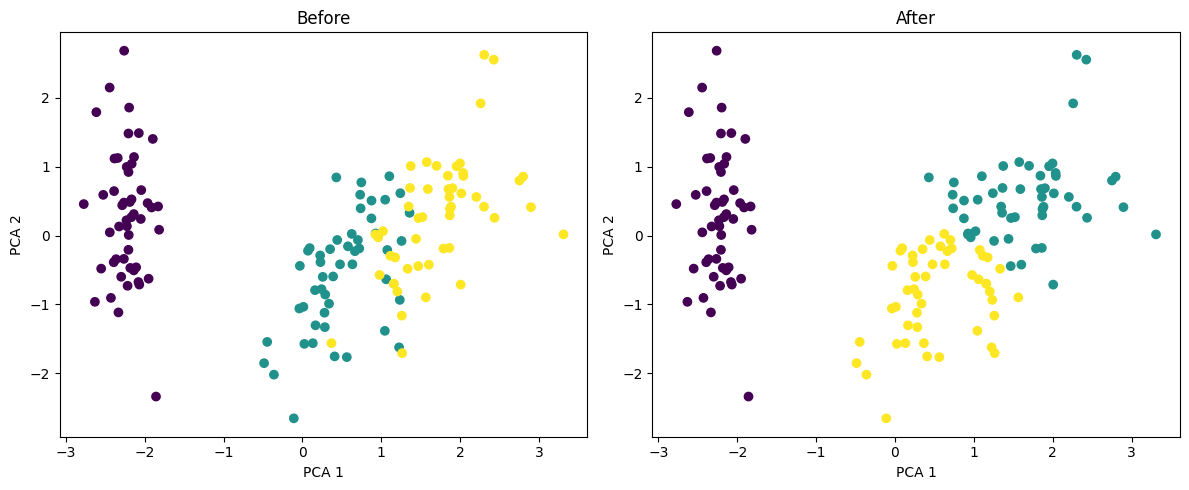

In [25]:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df["Class"]=y

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans1 = KMeans(n_clusters=2,random_state=0)
labels = kmeans1.fit_predict(X_scaled)

cluster0 = np.where(labels==0)[0]
cluster1 = np.where(labels==1)[0]

if len(cluster0) > len(cluster1):
    large = cluster0
    other = cluster1
else:
    large = cluster1
    other = cluster0

kmeans2 = KMeans(n_clusters=2,random_state=0)
label2 = kmeans1.fit_predict(X_scaled[large])

label_diana = np.zeros(len(X_scaled),dtype=int)

label_diana[other]=0
label_diana[large[label2==0]]=1
label_diana[large[label2==1]]=2

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Before")

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0],X_pca[:,1],c=label_diana)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("After")

plt.tight_layout()
plt.show()





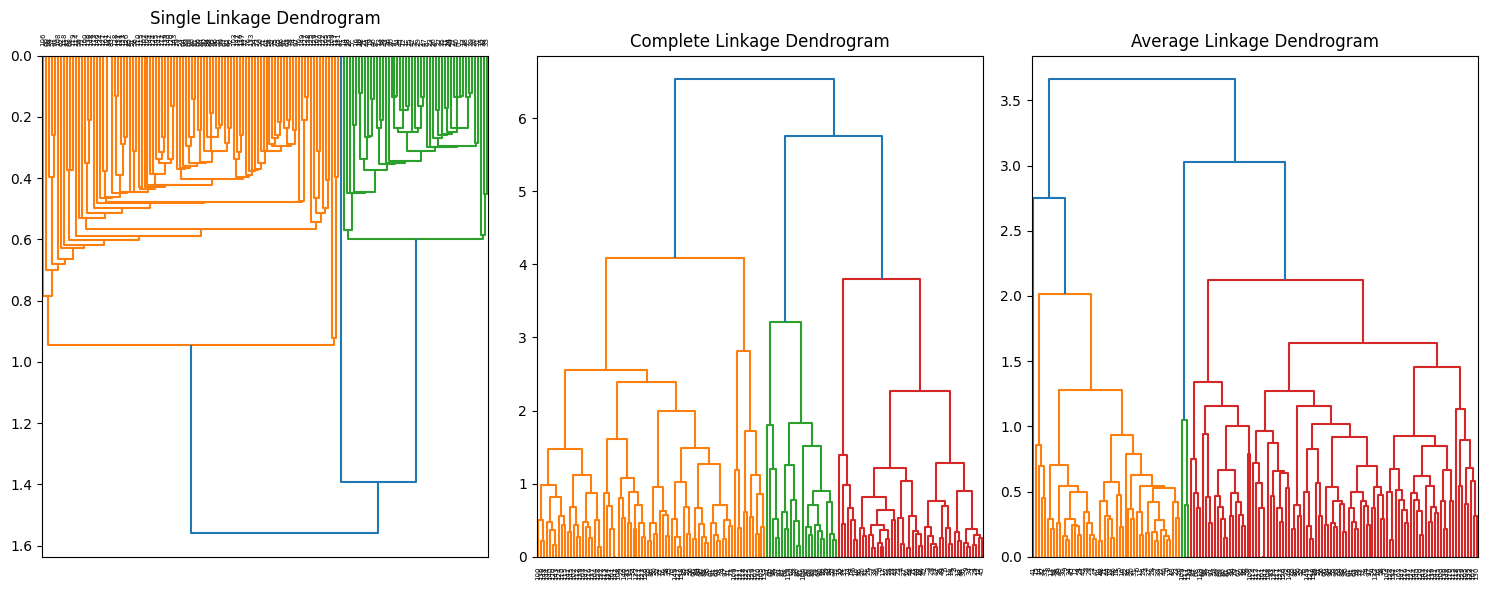

In [27]:
# -------- DENDROGRAMS --------
plt.figure(figsize=(15, 6))

# Single linkage dendrogram
Z_single = linkage(X_scaled, method='single')
plt.subplot(1, 3, 1)
dendrogram(Z_single,orientation= "bottom")
plt.title("Single Linkage Dendrogram")

# Complete linkage dendrogram
Z_complete = linkage(X_scaled, method='complete')
plt.subplot(1, 3, 2)
dendrogram(Z_complete)
plt.title("Complete Linkage Dendrogram")

# Average linkage dendrogram
Z_average = linkage(X_scaled, method='average')
plt.subplot(1, 3, 3)
dendrogram(Z_average)
plt.title("Average Linkage Dendrogram")

plt.tight_layout()
plt.show()


# ID3

In [46]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

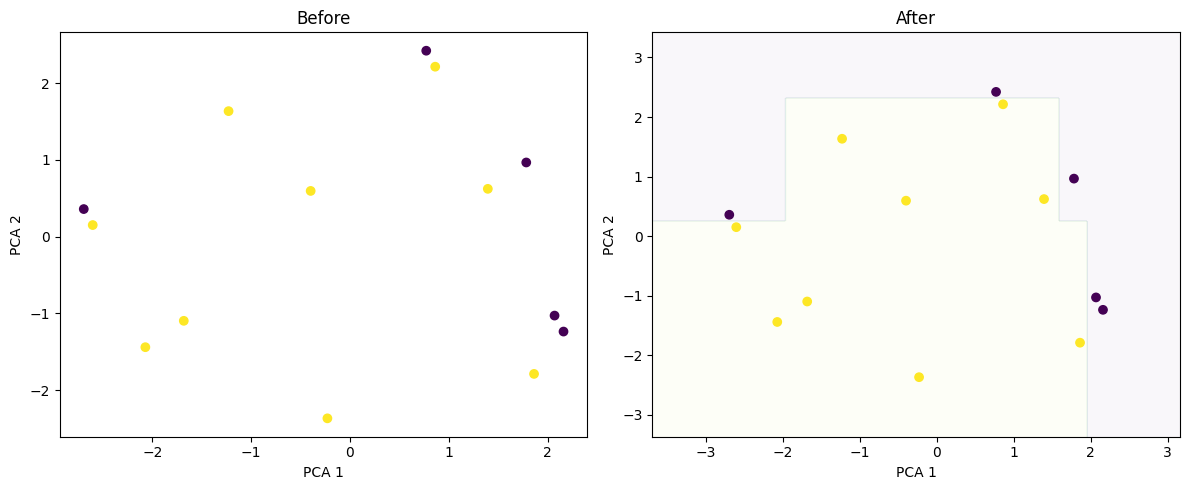

In [45]:
df= pd.read_csv("/home/ubuntu/Desktop/practical/golf-dataset.csv")

X = df.drop("Play Golf", axis=1)
y = df["Play Golf"]

X_encoded = pd.get_dummies(X)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


id3 = DecisionTreeClassifier(criterion="entropy",random_state=0)
id3.fit(X_pca,y_encoded)

x_min,x_max = X_pca[:,0].min()-1,X_pca[:,0].max()+1
y_min,y_max = X_pca[:,1].min()-1,X_pca[:,1].max()+1

xx,yy = np.meshgrid(
    np.linspace(x_min,x_max,300),
    np.linspace(y_min,y_max,300)
)

Z = id3.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_encoded)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Before")

plt.subplot(1,2,2)
plt.contourf(xx,yy,Z,alpha=0.03)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_encoded)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("After")

plt.tight_layout()
plt.show()

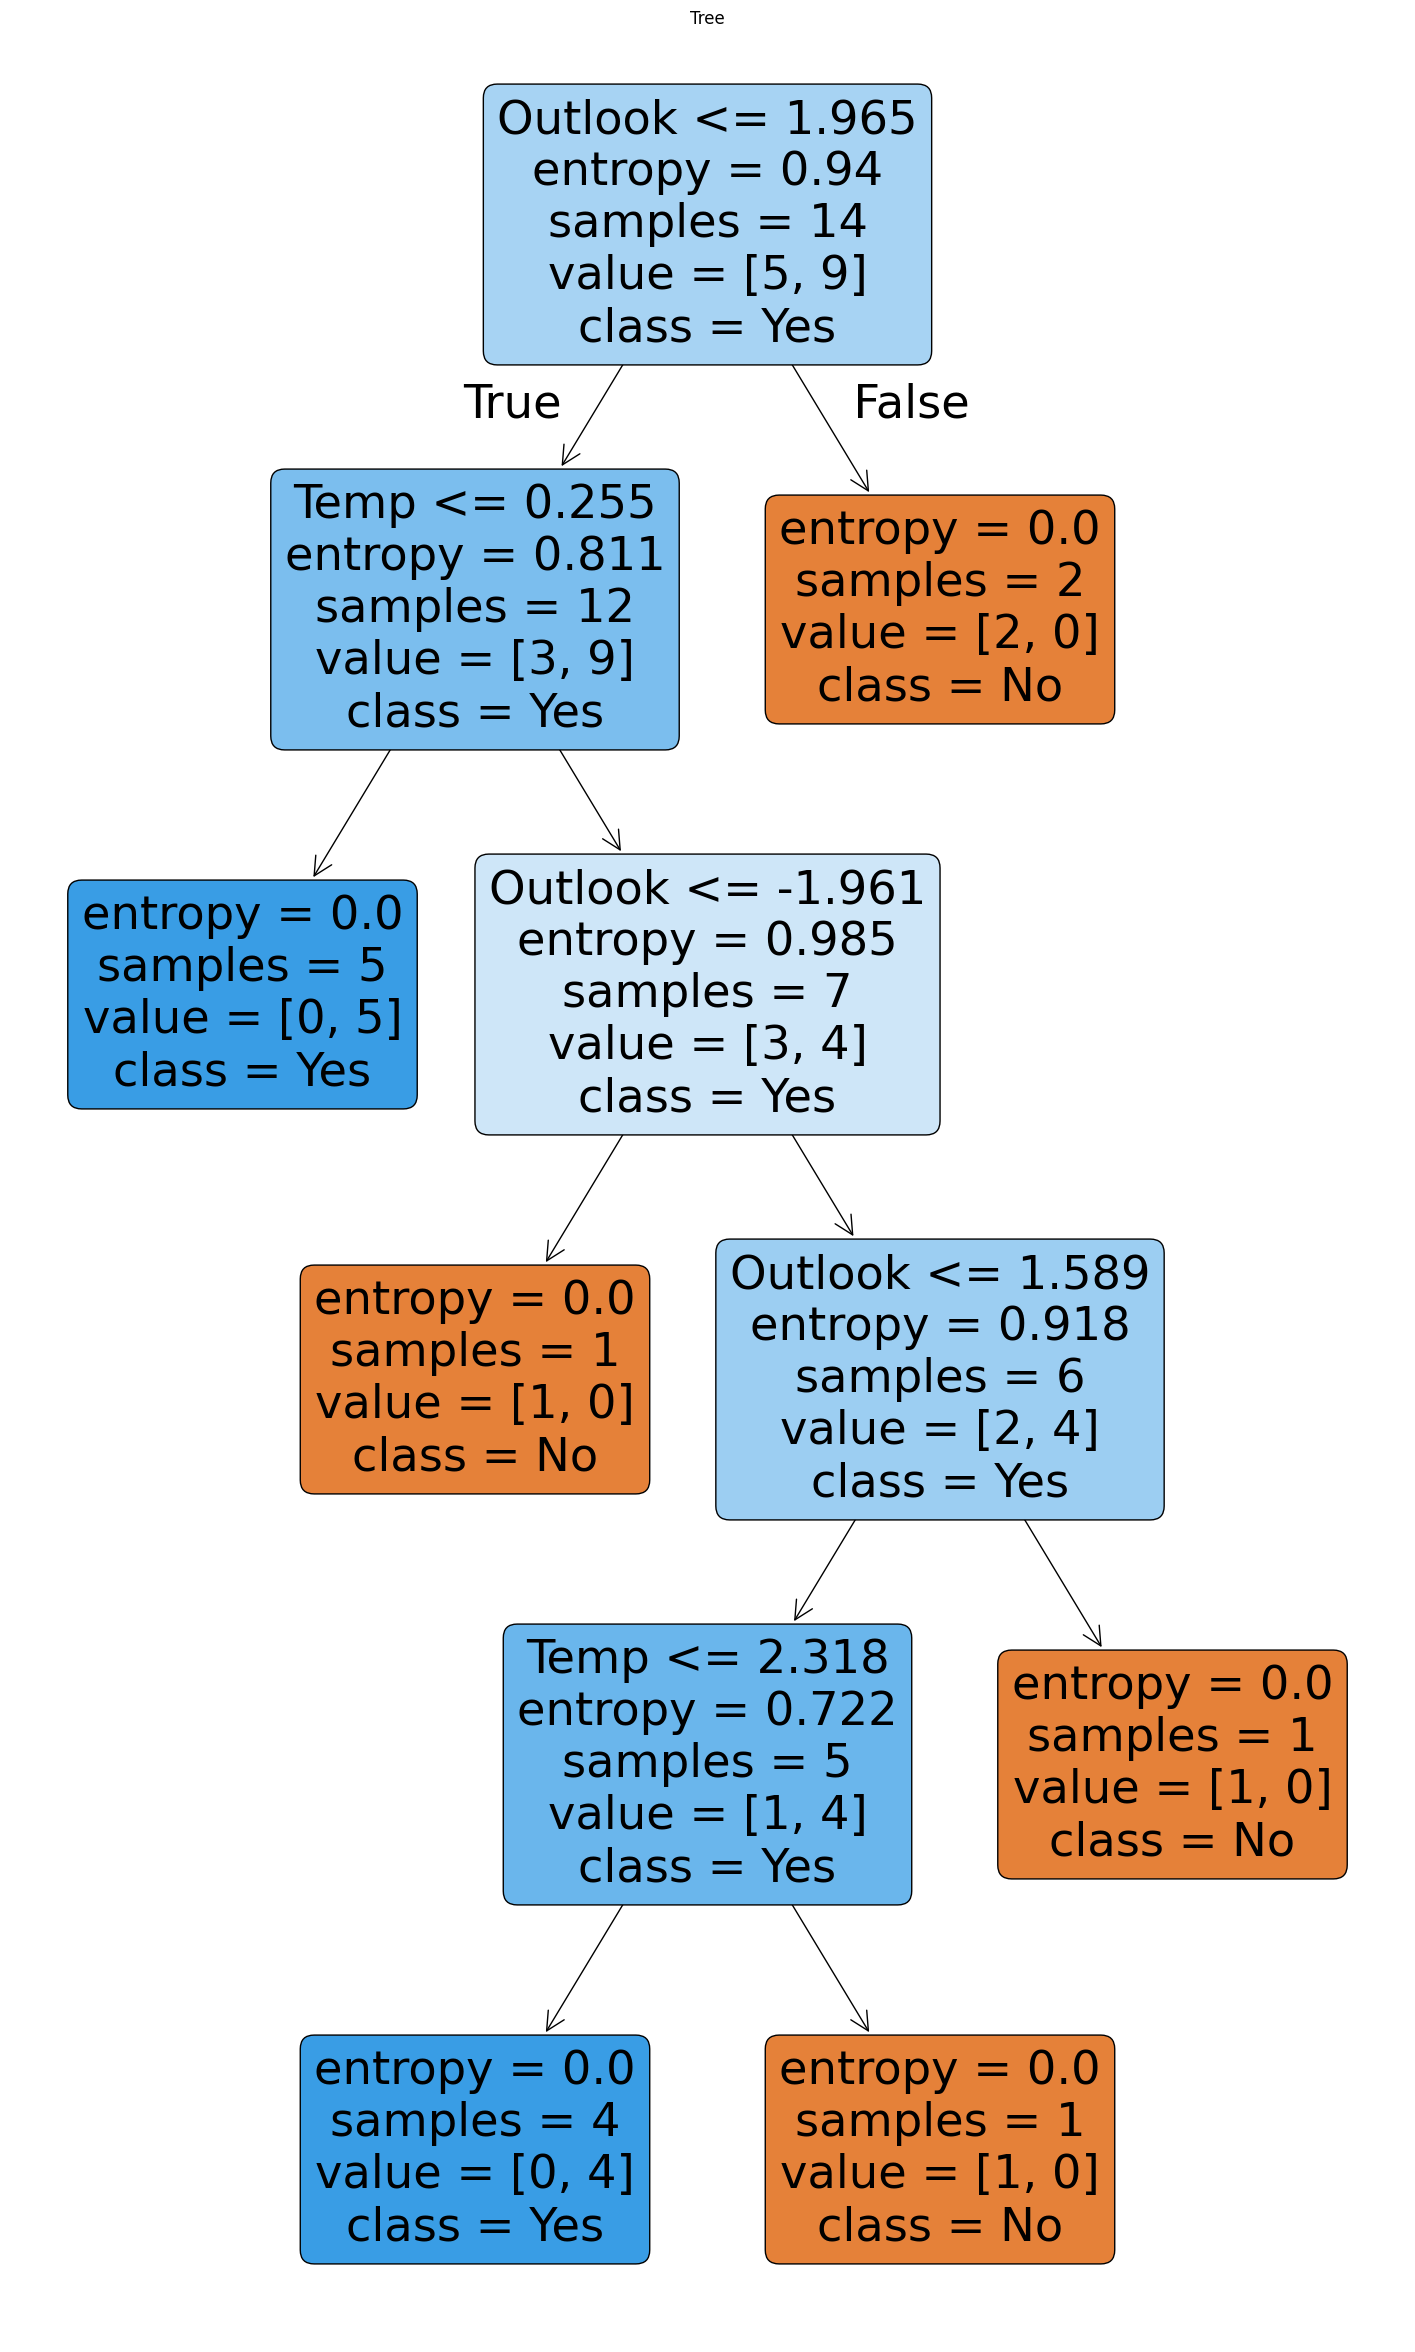

In [51]:
plt.figure(figsize=(18,30))

plot_tree(
    id3,
    feature_names=X.columns.tolist(),
    class_names=y.unique().astype(str).tolist(),
    rounded=True,
    filled=True
)
plt.title("Tree")
plt.show()

# CART

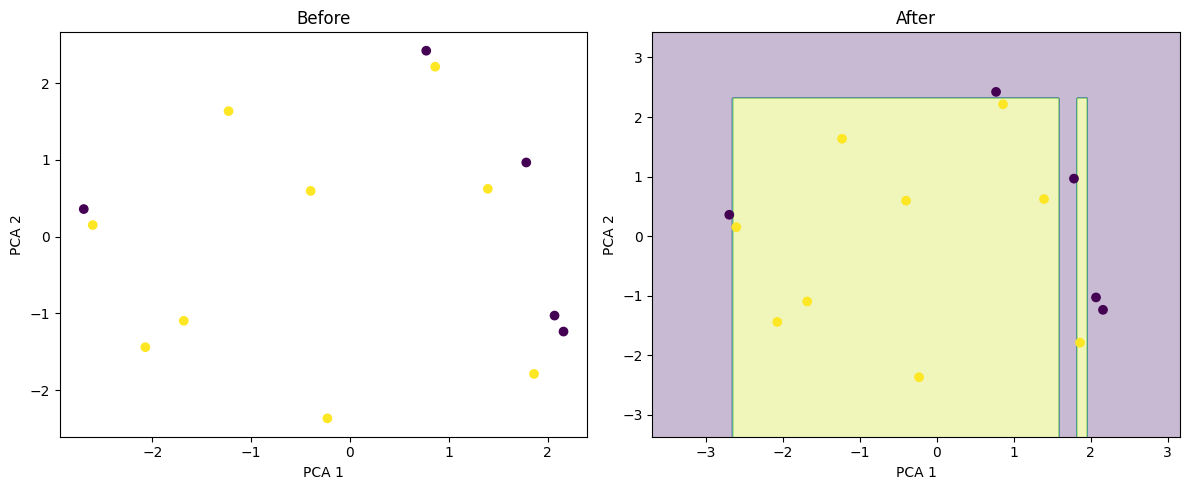

In [61]:
df= pd.read_csv("/home/ubuntu/Desktop/practical/golf-dataset.csv")

X = df.drop("Play Golf", axis=1)
y = df["Play Golf"]

X_encoded = pd.get_dummies(X)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


cart = DecisionTreeClassifier(criterion="gini",random_state=0)
cart.fit(X_pca,y_encoded)

x_min,x_max = X_pca[:,0].min()-1,X_pca[:,0].max()+1
y_min,y_max = X_pca[:,1].min()-1,X_pca[:,1].max()+1

xx,yy = np.meshgrid(
    np.linspace(x_min,x_max,300),
    np.linspace(y_min,y_max,300)
)

Z = cart.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_encoded)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Before")

plt.subplot(1,2,2)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_encoded)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("After")

plt.tight_layout()
plt.show()

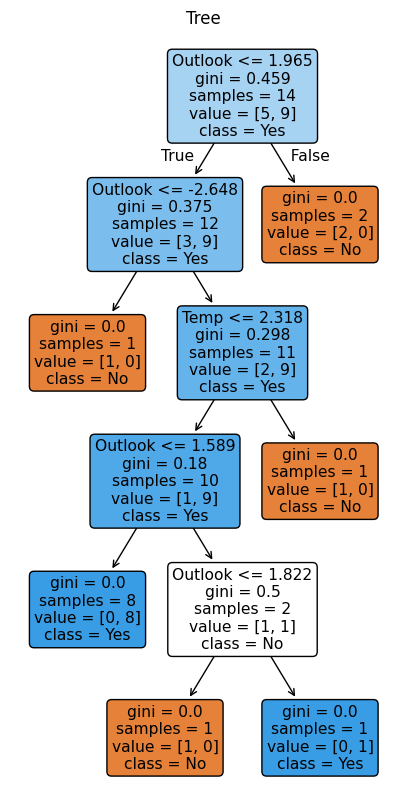

In [60]:
plt.figure(figsize=(5,10))

plot_tree(
    cart,
    feature_names=X.columns.tolist(),
    class_names=y.unique().astype(str).tolist(),
    rounded=True,
    filled=True
)
plt.title("Tree")
plt.show()

# Naive Bayesian Classifier

In [63]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

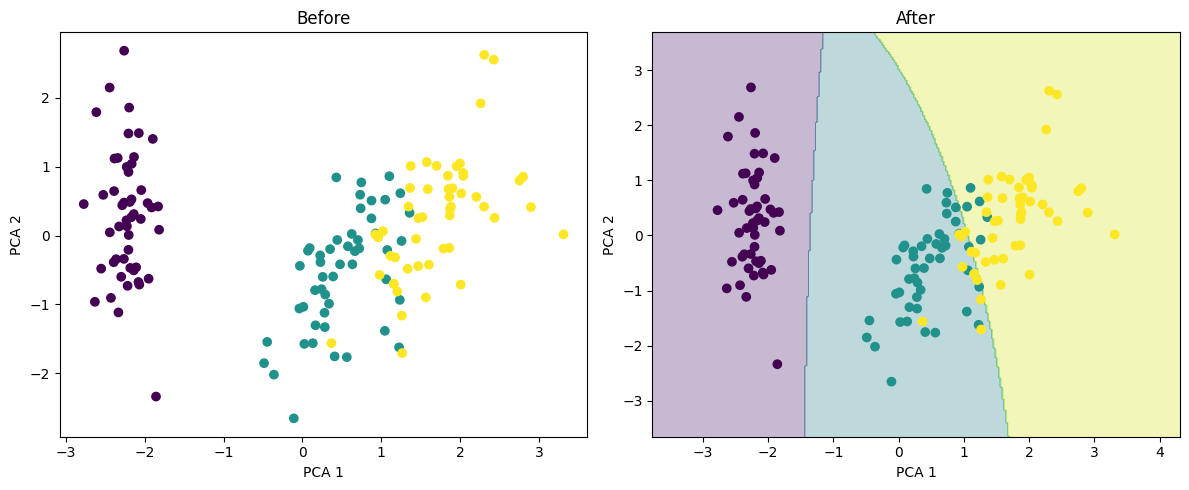

In [67]:
iris=load_iris()
X = iris.data
y= iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


nb = GaussianNB()
nb.fit(X_pca,y)

x_min,x_max = X_pca[:,0].min()-1,X_pca[:,0].max()+1
y_min,y_max = X_pca[:,1].min()-1,X_pca[:,1].max()+1

xx,yy = np.meshgrid(
    np.linspace(x_min,x_max,300),
    np.linspace(y_min,y_max,300)
)

Z = nb.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Before")

plt.subplot(1,2,2)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("After")

plt.tight_layout()
plt.show()

# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

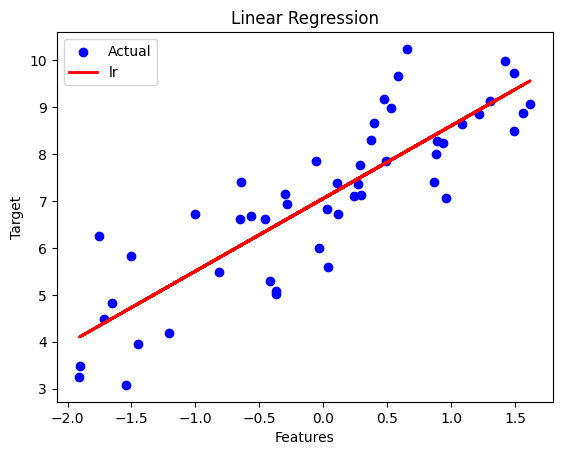

Slope : 1.5499366205731342
Intercept : 7.055281669180159


In [78]:
np.random.seed(0)
X = 2* np.random.rand(50,1)
y = 4+3*X+np.random.randn(50,1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lr = LinearRegression()
lr.fit(X_scaled,y)

y_pred = lr.predict(X_scaled)

plt.scatter(X_scaled,y,color='blue',label='Actual')
plt.plot(X_scaled,y_pred,color='red',label='lr',linewidth=2)
plt.xlabel("Features")
plt.ylabel("Target")
plt.title("Linear Regression")
plt.legend()
plt.show()


print("Slope :",lr.coef_[0][0])
print("Intercept :",lr.intercept_[0])


# KNN

Confusion Matrix:
[[197  15]
 [ 12 345]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       212
           1       0.96      0.97      0.96       357

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569



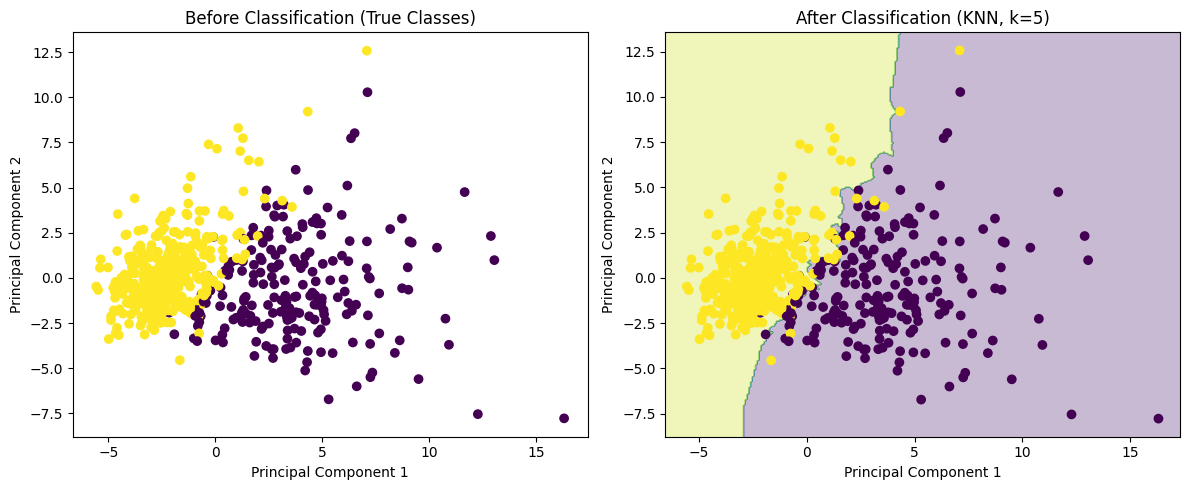

In [79]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load Iris dataset
iris = load_breast_cancer()
X = iris.data
y = iris.target

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# -------- BEFORE: Dataset Plot --------
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Before Classification (True Classes)")

# -------- KNN CLASSIFIER --------
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_pca, y)

# Predict on actual data (for confusion matrix)
y_pred = knn.predict(X_pca)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y, y_pred))

# -------- Decision Region --------
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# -------- AFTER: Decision Regions --------
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"After Classification (KNN, k={k})")

plt.tight_layout()
plt.show()


Confusion Matrix:
[[197  15]
 [ 12 345]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       212
           1       0.96      0.97      0.96       357

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569



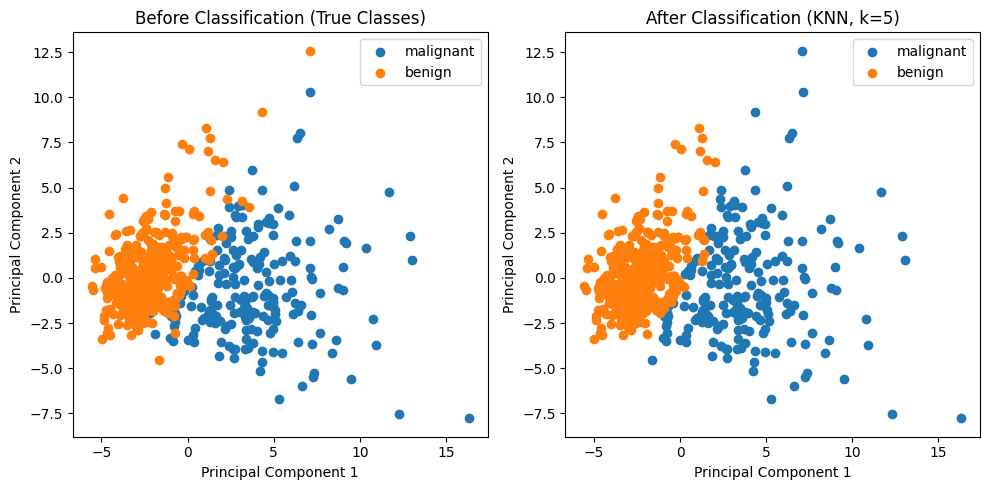

In [80]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load Iris dataset
iris = load_breast_cancer()
X = iris.data
y = iris.target
class_names = iris.target_names

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# -------- BEFORE: Dataset Plot --------
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
for i, name in enumerate(class_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=name)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Before Classification (True Classes)")
plt.legend()

# -------- KNN CLASSIFIER --------
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_pca, y)

# Predict on actual data (for confusion matrix)
y_pred = knn.predict(X_pca)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y, y_pred))

# -------- AFTER: KNN Classification (Simplified) --------
plt.subplot(1, 2, 2)
for i, name in enumerate(class_names):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], label=name)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"After Classification (KNN, k={k})")
plt.legend()

plt.tight_layout()
plt.show()


# Back Propagation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Input & Target
X = np.array([[1, 1, 0, 1]], dtype=np.float32)
y = np.array([[1, 0]], dtype=np.float32)

# Build 4–3–2–2 network
model = Sequential([
    Dense(3, activation='sigmoid', input_shape=(4,)),
    Dense(2, activation='sigmoid'),
    Dense(2, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),
    loss='mse'
)

# Callback to print error + parameters
class PrintAll(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}")
        print("Loss (Error):", logs['loss'])
        for i, layer in enumerate(self.model.layers):
            w, b = layer.get_weights()
            print(f"Layer {i+1} Weights:\n{w}")
            print(f"Layer {i+1} Biases:\n{b}")

# Train
model.fit(X, y, epochs=10, callbacks=[PrintAll()], verbose=0)

# Final output
print("\nFinal Prediction:", model.predict(X))


: 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# -------- Load IRIS --------
iris = load_iris()
X = iris.data            # (150,4)
y = iris.target.reshape(-1, 1)

# One-hot encode target
enc = OneHotEncoder(sparse_output=False)
y = enc.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# -------- Build ANN --------
model = Sequential([
    Dense(3, activation='sigmoid', input_shape=(4,)),
    Dense(2, activation='sigmoid'),
    Dense(3, activation='sigmoid')   # 3 output classes
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss='mse',
    metrics=['accuracy']
)

# -------- Callback to print --------
class PrintAll(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}")
        print("Loss:", logs['loss'], "Accuracy:", logs['accuracy'])
        for i, layer in enumerate(self.model.layers):
            w, b = layer.get_weights()
            print(f"Layer {i+1} Weights:\n{w}")
            print(f"Layer {i+1} Biases:\n{b}")

# -------- Train --------
model.fit(X_train, y_train, epochs=10, callbacks=[PrintAll()], verbose=0)

# -------- Test --------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("\nTest Accuracy:", acc)

pred = model.predict(X_test[:5])
print("\nSample Predictions:\n", pred)


# Perceptron

In [82]:
import numpy as np

def train_perceptron(X, T, lr=1, epochs=10):
    w = np.zeros(X.shape[1])
    b = 0

    print("\nInitial weights:", w, "bias:", b)

    for ep in range(epochs):
        print(f"\nEpoch {ep+1}")
        for i in range(len(X)):
            net = np.dot(X[i], w) + b
            y = 1 if net >= 0 else -1
            error = T[i] - y

            w = w + lr * error * X[i]
            b = b + lr * error

            print(f"x={X[i]}, t={T[i]}, y={y}, error={error}")
            print("Updated w:", w, "b:", b)

    return w, b


In [83]:
X = np.array([[-1,-1], [-1,1], [1,-1], [1,1]])
T_and = np.array([-1, -1, -1, 1])

print("Training Bipolar AND")
train_perceptron(X, T_and)


T_or = np.array([-1, 1, 1, 1])

print("\nTraining Bipolar OR")
train_perceptron(X, T_or)


T_nand = np.array([1, 1, 1, -1])

print("\nTraining Bipolar NAND")
train_perceptron(X, T_nand)


Training Bipolar AND

Initial weights: [0. 0.] bias: 0

Epoch 1
x=[-1 -1], t=-1, y=1, error=-2
Updated w: [2. 2.] b: -2
x=[-1  1], t=-1, y=-1, error=0
Updated w: [2. 2.] b: -2
x=[ 1 -1], t=-1, y=-1, error=0
Updated w: [2. 2.] b: -2
x=[1 1], t=1, y=1, error=0
Updated w: [2. 2.] b: -2

Epoch 2
x=[-1 -1], t=-1, y=-1, error=0
Updated w: [2. 2.] b: -2
x=[-1  1], t=-1, y=-1, error=0
Updated w: [2. 2.] b: -2
x=[ 1 -1], t=-1, y=-1, error=0
Updated w: [2. 2.] b: -2
x=[1 1], t=1, y=1, error=0
Updated w: [2. 2.] b: -2

Epoch 3
x=[-1 -1], t=-1, y=-1, error=0
Updated w: [2. 2.] b: -2
x=[-1  1], t=-1, y=-1, error=0
Updated w: [2. 2.] b: -2
x=[ 1 -1], t=-1, y=-1, error=0
Updated w: [2. 2.] b: -2
x=[1 1], t=1, y=1, error=0
Updated w: [2. 2.] b: -2

Epoch 4
x=[-1 -1], t=-1, y=-1, error=0
Updated w: [2. 2.] b: -2
x=[-1  1], t=-1, y=-1, error=0
Updated w: [2. 2.] b: -2
x=[ 1 -1], t=-1, y=-1, error=0
Updated w: [2. 2.] b: -2
x=[1 1], t=1, y=1, error=0
Updated w: [2. 2.] b: -2

Epoch 5
x=[-1 -1], t=-1, y=-

(array([-2., -2.]), 2)

# Apriori

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from transactions import dataset

# Convert transactions into one-hot encoded DataFrame
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)

df = pd.DataFrame(te_array, columns=te.columns_)

print("One-Hot Encoded Dataset:\n")
print(df)

# Apply Apriori Algorithm
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

print("\nFrequent Itemsets:\n")
print(frequent_itemsets)

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

print("\nAssociation Rules:\n")
print(rules[["antecedents", "consequents", "confidence"]])

One-Hot Encoded Dataset:

   Bread  Butter    Jam   Milk
0   True    True  False   True
1   True    True  False  False
2   True   False  False   True
3  False    True  False   True
4   True    True   True  False

Frequent Itemsets:

   support         itemsets
0      0.8          (Bread)
1      0.8         (Butter)
2      0.6           (Milk)
3      0.6  (Bread, Butter)
4      0.4    (Bread, Milk)
5      0.4   (Milk, Butter)

Association Rules:

  antecedents consequents  confidence
0     (Bread)    (Butter)    0.750000
1    (Butter)     (Bread)    0.750000
2      (Milk)     (Bread)    0.666667
3      (Milk)    (Butter)    0.666667
